## 1.데이터 개요, 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


**-var3값이 이상하다고 판단하여 조사(min값이-99999)->보통 garbage값**

In [4]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

**-var3데이터 값이 퍼져 있으므로 평균값보다는 최빈값으로 대체 + 식별자 컬럼 'ID' drop**

In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True) 
cust_df.drop('ID', axis=1, inplace=True)

### >데이터 초기 분석 및 전처리 결과 -> 컬럼갯수가 많으므로 부스팅 방식으로 분류 알고리즘 결정
---------------------------------

### 2.데이터셋 나누기 및 학습

In [6]:
from sklearn.model_selection import train_test_split

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

피처 데이터 shape:(76020, 369)
학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


**-XGB학습을 위해 검증데이터 셋까지 세부분리**

In [7]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

**-XGBoost 모델 학습**

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 분류기 모델 생성 (일단 파라미터 튜닝전 파라미터 범위 내의 임의의 값으로 학습 시켜보기)
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, min_child_weight=3, colsample_bytree=0.75)

# 성능 평가 지표를 auc(분류문제의 평가지표로 적합)로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]) #roc_auc_score에서는 특정 레이블값(1)으로 예측한 확률(predict_proba)가 인자로 들어간다.
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82151	validation_1-auc:0.80747
[1]	validation_0-auc:0.82958	validation_1-auc:0.80969
[2]	validation_0-auc:0.83038	validation_1-auc:0.80973
[3]	validation_0-auc:0.83362	validation_1-auc:0.81072
[4]	validation_0-auc:0.83443	validation_1-auc:0.80994
[5]	validation_0-auc:0.83659	validation_1-auc:0.81169
[6]	validation_0-auc:0.83815	validation_1-auc:0.81150
[7]	validation_0-auc:0.83907	validation_1-auc:0.81176
[8]	validation_0-auc:0.83949	validation_1-auc:0.81134
[9]	validation_0-auc:0.84172	validation_1-auc:0.81616
[10]	validation_0-auc:0.84143	validation_1-auc:0.81483
[11]	validation_0-auc:0.84225	validation_1-auc:0.81557
[12]	validation_0-auc:0.84313	validation_1-auc:0.81691
[13]	validation_0-auc:0.84465	validation_1-auc:0.81763
[14]	validation_0-auc:0.84836	validation_1-auc:0.82035
[15]	validation_0-auc:0.84865	validation_1-auc:0.82022
[16]	validation_0-auc:0.84929	validation_1-auc:0.82114
[17]	validation_0-auc:0.85167	validation_1-auc:0.82158
[18]	validation_0-au

[149]	validation_0-auc:0.89701	validation_1-auc:0.83459
[150]	validation_0-auc:0.89726	validation_1-auc:0.83461
[151]	validation_0-auc:0.89729	validation_1-auc:0.83468
[152]	validation_0-auc:0.89735	validation_1-auc:0.83470
[153]	validation_0-auc:0.89743	validation_1-auc:0.83474
[154]	validation_0-auc:0.89762	validation_1-auc:0.83480
[155]	validation_0-auc:0.89777	validation_1-auc:0.83473
[156]	validation_0-auc:0.89803	validation_1-auc:0.83482
[157]	validation_0-auc:0.89818	validation_1-auc:0.83490
[158]	validation_0-auc:0.89830	validation_1-auc:0.83496
[159]	validation_0-auc:0.89835	validation_1-auc:0.83498
[160]	validation_0-auc:0.89862	validation_1-auc:0.83502
[161]	validation_0-auc:0.89881	validation_1-auc:0.83505
[162]	validation_0-auc:0.89886	validation_1-auc:0.83506
[163]	validation_0-auc:0.89906	validation_1-auc:0.83491
[164]	validation_0-auc:0.89908	validation_1-auc:0.83496
[165]	validation_0-auc:0.89922	validation_1-auc:0.83488
[166]	validation_0-auc:0.89930	validation_1-auc:

**-베이지안 최적화 방식을 이용한 파라미터 튜닝을 위한 파라미터 탐색공간 나누기**

In [12]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로 [quniform()]
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. [uniform()]

search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

**-목적함수 정의(반환값으로 모델을 kfold로 나눈 데이터로 학습 후 auc값들의 평균값으로 설정)**

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 kfold방식으로 3단계 분리 -> 교차검증을 위함
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. ->아까 auc로 지표 선택했으므로 'auc'
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [17]:
from hyperopt import fmin, tpe, Trials

trials = Trials() #각회차당 파라미터 값 저장

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=search_space,
            algo=tpe.suggest,
            max_evals=10, # 최대 반복 횟수를 지정합니다.(많이 반복하면 최적의 값을 찾기 좋다.)
            trials=trials)

print('best:', best)

[0]	validation_0-auc:0.83016	validation_1-auc:0.80144                                                                  
[1]	validation_0-auc:0.83681	validation_1-auc:0.80511                                                                  
[2]	validation_0-auc:0.84157	validation_1-auc:0.80677                                                                  
[3]	validation_0-auc:0.84515	validation_1-auc:0.81020                                                                  
[4]	validation_0-auc:0.85004	validation_1-auc:0.81209                                                                  
[5]	validation_0-auc:0.85011	validation_1-auc:0.80993                                                                  
[6]	validation_0-auc:0.85376	validation_1-auc:0.81437                                                                  
[7]	validation_0-auc:0.85756	validation_1-auc:0.81609                                                                  
[8]	validation_0-auc:0.85910	validation_

[68]	validation_0-auc:0.93292	validation_1-auc:0.82640                                                                 
[69]	validation_0-auc:0.93340	validation_1-auc:0.82680                                                                 
[70]	validation_0-auc:0.93423	validation_1-auc:0.82636                                                                 
[71]	validation_0-auc:0.93443	validation_1-auc:0.82570                                                                 
[72]	validation_0-auc:0.93546	validation_1-auc:0.82593                                                                 
[73]	validation_0-auc:0.93597	validation_1-auc:0.82528                                                                 
[74]	validation_0-auc:0.93673	validation_1-auc:0.82475                                                                 
[75]	validation_0-auc:0.93754	validation_1-auc:0.82538                                                                 
[76]	validation_0-auc:0.93833	validation

[6]	validation_0-auc:0.86118	validation_1-auc:0.82142                                                                  
[7]	validation_0-auc:0.86213	validation_1-auc:0.82126                                                                  
[8]	validation_0-auc:0.86380	validation_1-auc:0.82132                                                                  
[9]	validation_0-auc:0.86700	validation_1-auc:0.82094                                                                  
[10]	validation_0-auc:0.86797	validation_1-auc:0.81954                                                                 
[11]	validation_0-auc:0.86863	validation_1-auc:0.81952                                                                 
[12]	validation_0-auc:0.86951	validation_1-auc:0.82035                                                                 
[13]	validation_0-auc:0.87266	validation_1-auc:0.82182                                                                 
[14]	validation_0-auc:0.87370	validation

[74]	validation_0-auc:0.93901	validation_1-auc:0.82470                                                                 
[75]	validation_0-auc:0.93963	validation_1-auc:0.82543                                                                 
[76]	validation_0-auc:0.94013	validation_1-auc:0.82582                                                                 
[77]	validation_0-auc:0.94035	validation_1-auc:0.82561                                                                 
[78]	validation_0-auc:0.94072	validation_1-auc:0.82615                                                                 
[79]	validation_0-auc:0.94131	validation_1-auc:0.82658                                                                 
[80]	validation_0-auc:0.94180	validation_1-auc:0.82684                                                                 
[81]	validation_0-auc:0.94238	validation_1-auc:0.82667                                                                 
[82]	validation_0-auc:0.94266	validation

[59]	validation_0-auc:0.89675	validation_1-auc:0.82848                                                                 
[60]	validation_0-auc:0.89730	validation_1-auc:0.82774                                                                 
[61]	validation_0-auc:0.89830	validation_1-auc:0.82728                                                                 
[62]	validation_0-auc:0.89874	validation_1-auc:0.82750                                                                 
[63]	validation_0-auc:0.89920	validation_1-auc:0.82683                                                                 
[64]	validation_0-auc:0.89998	validation_1-auc:0.82726                                                                 
[65]	validation_0-auc:0.90084	validation_1-auc:0.82724                                                                 
[66]	validation_0-auc:0.90129	validation_1-auc:0.82701                                                                 
[67]	validation_0-auc:0.90168	validation

[27]	validation_0-auc:0.87559	validation_1-auc:0.82740                                                                 
[28]	validation_0-auc:0.87580	validation_1-auc:0.82872                                                                 
[29]	validation_0-auc:0.87722	validation_1-auc:0.82884                                                                 
[30]	validation_0-auc:0.87771	validation_1-auc:0.82751                                                                 
[31]	validation_0-auc:0.87939	validation_1-auc:0.82810                                                                 
[32]	validation_0-auc:0.88014	validation_1-auc:0.82861                                                                 
[33]	validation_0-auc:0.88060	validation_1-auc:0.82896                                                                 
[34]	validation_0-auc:0.88117	validation_1-auc:0.82904                                                                 
[35]	validation_0-auc:0.88237	validation

[11]	validation_0-auc:0.85846	validation_1-auc:0.82163                                                                 
[12]	validation_0-auc:0.85903	validation_1-auc:0.82195                                                                 
[13]	validation_0-auc:0.86023	validation_1-auc:0.82259                                                                 
[14]	validation_0-auc:0.86199	validation_1-auc:0.82421                                                                 
[15]	validation_0-auc:0.86398	validation_1-auc:0.82464                                                                 
[16]	validation_0-auc:0.86588	validation_1-auc:0.82582                                                                 
[17]	validation_0-auc:0.86663	validation_1-auc:0.82645                                                                 
[18]	validation_0-auc:0.86633	validation_1-auc:0.82568                                                                 
[19]	validation_0-auc:0.86747	validation

[0]	validation_0-auc:0.82652	validation_1-auc:0.80107                                                                  
[1]	validation_0-auc:0.83658	validation_1-auc:0.80507                                                                  
[2]	validation_0-auc:0.84696	validation_1-auc:0.81145                                                                  
[3]	validation_0-auc:0.85076	validation_1-auc:0.81101                                                                  
[4]	validation_0-auc:0.85370	validation_1-auc:0.81228                                                                  
[5]	validation_0-auc:0.85691	validation_1-auc:0.81385                                                                  
[6]	validation_0-auc:0.86067	validation_1-auc:0.81535                                                                  
[7]	validation_0-auc:0.86432	validation_1-auc:0.81653                                                                  
[8]	validation_0-auc:0.86682	validation_

[9]	validation_0-auc:0.87662	validation_1-auc:0.82812                                                                  
[10]	validation_0-auc:0.87717	validation_1-auc:0.82521                                                                 
[11]	validation_0-auc:0.87835	validation_1-auc:0.82369                                                                 
[12]	validation_0-auc:0.88623	validation_1-auc:0.82582                                                                 
[13]	validation_0-auc:0.89034	validation_1-auc:0.82839                                                                 
[14]	validation_0-auc:0.89321	validation_1-auc:0.82885                                                                 
[15]	validation_0-auc:0.89704	validation_1-auc:0.82881                                                                 
[16]	validation_0-auc:0.89928	validation_1-auc:0.82995                                                                 
[17]	validation_0-auc:0.90123	validation

[77]	validation_0-auc:0.94944	validation_1-auc:0.83105                                                                 
[78]	validation_0-auc:0.94951	validation_1-auc:0.83094                                                                 
[0]	validation_0-auc:0.83438	validation_1-auc:0.81112                                                                  
[1]	validation_0-auc:0.84268	validation_1-auc:0.81221                                                                  
[2]	validation_0-auc:0.85012	validation_1-auc:0.81692                                                                  
[3]	validation_0-auc:0.85518	validation_1-auc:0.82010                                                                  
[4]	validation_0-auc:0.86021	validation_1-auc:0.82119                                                                  
[5]	validation_0-auc:0.86141	validation_1-auc:0.82056                                                                  
[6]	validation_0-auc:0.86611	validation_

[3]	validation_0-auc:0.84241	validation_1-auc:0.81006                                                                  
[4]	validation_0-auc:0.84630	validation_1-auc:0.81557                                                                  
[5]	validation_0-auc:0.84805	validation_1-auc:0.81555                                                                  
[6]	validation_0-auc:0.84943	validation_1-auc:0.81439                                                                  
[7]	validation_0-auc:0.85135	validation_1-auc:0.81499                                                                  
[8]	validation_0-auc:0.85260	validation_1-auc:0.81591                                                                  
[9]	validation_0-auc:0.85897	validation_1-auc:0.81923                                                                  
[10]	validation_0-auc:0.85946	validation_1-auc:0.81751                                                                 
[11]	validation_0-auc:0.86151	validation

[71]	validation_0-auc:0.91741	validation_1-auc:0.82972                                                                 
[72]	validation_0-auc:0.91769	validation_1-auc:0.82978                                                                 
[73]	validation_0-auc:0.91837	validation_1-auc:0.82953                                                                 
[74]	validation_0-auc:0.91846	validation_1-auc:0.82980                                                                 
[75]	validation_0-auc:0.91861	validation_1-auc:0.82992                                                                 
[76]	validation_0-auc:0.91880	validation_1-auc:0.83002                                                                 
[77]	validation_0-auc:0.91910	validation_1-auc:0.83001                                                                 
[78]	validation_0-auc:0.91926	validation_1-auc:0.82986                                                                 
[79]	validation_0-auc:0.91945	validation

[58]	validation_0-auc:0.91404	validation_1-auc:0.83489                                                                 
[59]	validation_0-auc:0.91441	validation_1-auc:0.83489                                                                 
[60]	validation_0-auc:0.91503	validation_1-auc:0.83493                                                                 
[61]	validation_0-auc:0.91558	validation_1-auc:0.83513                                                                 
[62]	validation_0-auc:0.91633	validation_1-auc:0.83482                                                                 
[63]	validation_0-auc:0.91682	validation_1-auc:0.83488                                                                 
[64]	validation_0-auc:0.91729	validation_1-auc:0.83469                                                                 
[65]	validation_0-auc:0.91795	validation_1-auc:0.83485                                                                 
[66]	validation_0-auc:0.91826	validation

[26]	validation_0-auc:0.88566	validation_1-auc:0.83094                                                                 
[27]	validation_0-auc:0.88743	validation_1-auc:0.83068                                                                 
[28]	validation_0-auc:0.88815	validation_1-auc:0.83067                                                                 
[29]	validation_0-auc:0.88924	validation_1-auc:0.83093                                                                 
[30]	validation_0-auc:0.89122	validation_1-auc:0.83071                                                                 
[31]	validation_0-auc:0.89204	validation_1-auc:0.83096                                                                 
[32]	validation_0-auc:0.89288	validation_1-auc:0.83134                                                                 
[33]	validation_0-auc:0.89311	validation_1-auc:0.83133                                                                 
[34]	validation_0-auc:0.89409	validation

[94]	validation_0-auc:0.92639	validation_1-auc:0.83265                                                                 
[95]	validation_0-auc:0.92696	validation_1-auc:0.83245                                                                 
[96]	validation_0-auc:0.92719	validation_1-auc:0.83264                                                                 
[97]	validation_0-auc:0.92736	validation_1-auc:0.83247                                                                 
[98]	validation_0-auc:0.92755	validation_1-auc:0.83239                                                                 
[99]	validation_0-auc:0.92769	validation_1-auc:0.83258                                                                 
[0]	validation_0-auc:0.82836	validation_1-auc:0.80024                                                                  
[1]	validation_0-auc:0.83945	validation_1-auc:0.80714                                                                  
[2]	validation_0-auc:0.84605	validation_

[4]	validation_0-auc:0.85892	validation_1-auc:0.82707                                                                  
[5]	validation_0-auc:0.86248	validation_1-auc:0.82633                                                                  
[6]	validation_0-auc:0.86805	validation_1-auc:0.82868                                                                  
[7]	validation_0-auc:0.87304	validation_1-auc:0.82908                                                                  
[8]	validation_0-auc:0.87803	validation_1-auc:0.83154                                                                  
[9]	validation_0-auc:0.88314	validation_1-auc:0.83242                                                                  
[10]	validation_0-auc:0.88457	validation_1-auc:0.82883                                                                 
[11]	validation_0-auc:0.88679	validation_1-auc:0.82676                                                                 
[12]	validation_0-auc:0.89262	validation

[13]	validation_0-auc:0.89585	validation_1-auc:0.82518                                                                 
[14]	validation_0-auc:0.89809	validation_1-auc:0.82659                                                                 
[15]	validation_0-auc:0.90095	validation_1-auc:0.82725                                                                 
[16]	validation_0-auc:0.90433	validation_1-auc:0.82795                                                                 
[17]	validation_0-auc:0.90759	validation_1-auc:0.83120                                                                 
[18]	validation_0-auc:0.90954	validation_1-auc:0.83040                                                                 
[19]	validation_0-auc:0.91260	validation_1-auc:0.82943                                                                 
[20]	validation_0-auc:0.91501	validation_1-auc:0.82866                                                                 
[21]	validation_0-auc:0.91671	validation

[17]	validation_0-auc:0.88728	validation_1-auc:0.82568                                                                 
[18]	validation_0-auc:0.88782	validation_1-auc:0.82510                                                                 
[19]	validation_0-auc:0.89155	validation_1-auc:0.82539                                                                 
[20]	validation_0-auc:0.89136	validation_1-auc:0.82486                                                                 
[21]	validation_0-auc:0.89175	validation_1-auc:0.82321                                                                 
[22]	validation_0-auc:0.89409	validation_1-auc:0.82421                                                                 
[23]	validation_0-auc:0.89759	validation_1-auc:0.82570                                                                 
[24]	validation_0-auc:0.89936	validation_1-auc:0.82755                                                                 
[25]	validation_0-auc:0.90061	validation

[1]	validation_0-auc:0.82998	validation_1-auc:0.80877                                                                  
[2]	validation_0-auc:0.83978	validation_1-auc:0.81894                                                                  
[3]	validation_0-auc:0.84338	validation_1-auc:0.82115                                                                  
[4]	validation_0-auc:0.85026	validation_1-auc:0.82259                                                                  
[5]	validation_0-auc:0.85355	validation_1-auc:0.82376                                                                  
[6]	validation_0-auc:0.86142	validation_1-auc:0.82694                                                                  
[7]	validation_0-auc:0.86334	validation_1-auc:0.82691                                                                  
[8]	validation_0-auc:0.86536	validation_1-auc:0.82867                                                                  
[9]	validation_0-auc:0.86705	validation_

[69]	validation_0-auc:0.94737	validation_1-auc:0.82990                                                                 
[70]	validation_0-auc:0.94774	validation_1-auc:0.82981                                                                 
[71]	validation_0-auc:0.94797	validation_1-auc:0.82965                                                                 
[72]	validation_0-auc:0.94828	validation_1-auc:0.82968                                                                 
[73]	validation_0-auc:0.94861	validation_1-auc:0.82983                                                                 
[74]	validation_0-auc:0.94894	validation_1-auc:0.82970                                                                 
[75]	validation_0-auc:0.94910	validation_1-auc:0.82990                                                                 
[76]	validation_0-auc:0.94910	validation_1-auc:0.83003                                                                 
[77]	validation_0-auc:0.94921	validation

[47]	validation_0-auc:0.93253	validation_1-auc:0.82826                                                                 
[48]	validation_0-auc:0.93322	validation_1-auc:0.82847                                                                 
[49]	validation_0-auc:0.93455	validation_1-auc:0.82890                                                                 
[50]	validation_0-auc:0.93497	validation_1-auc:0.82864                                                                 
[51]	validation_0-auc:0.93564	validation_1-auc:0.82855                                                                 
[52]	validation_0-auc:0.93632	validation_1-auc:0.82851                                                                 
[53]	validation_0-auc:0.93703	validation_1-auc:0.82883                                                                 
[54]	validation_0-auc:0.93759	validation_1-auc:0.82903                                                                 
[55]	validation_0-auc:0.93831	validation

[25]	validation_0-auc:0.94135	validation_1-auc:0.82600                                                                 
[26]	validation_0-auc:0.94354	validation_1-auc:0.82504                                                                 
[27]	validation_0-auc:0.94635	validation_1-auc:0.82526                                                                 
[28]	validation_0-auc:0.94784	validation_1-auc:0.82465                                                                 
[29]	validation_0-auc:0.94918	validation_1-auc:0.82439                                                                 
[30]	validation_0-auc:0.95022	validation_1-auc:0.82374                                                                 
[31]	validation_0-auc:0.95121	validation_1-auc:0.82330                                                                 
[32]	validation_0-auc:0.95202	validation_1-auc:0.82335                                                                 
[33]	validation_0-auc:0.95230	validation

[45]	validation_0-auc:0.96058	validation_1-auc:0.82734                                                                 
[0]	validation_0-auc:0.83859	validation_1-auc:0.80933                                                                  
[1]	validation_0-auc:0.84736	validation_1-auc:0.81042                                                                  
[2]	validation_0-auc:0.85380	validation_1-auc:0.81550                                                                  
[3]	validation_0-auc:0.85654	validation_1-auc:0.81380                                                                  
[4]	validation_0-auc:0.86452	validation_1-auc:0.81711                                                                  
[5]	validation_0-auc:0.86975	validation_1-auc:0.81995                                                                  
[6]	validation_0-auc:0.87692	validation_1-auc:0.82316                                                                  
[7]	validation_0-auc:0.88128	validation_

[20]	validation_0-auc:0.83504	validation_1-auc:0.81166                                                                 
[21]	validation_0-auc:0.83201	validation_1-auc:0.80750                                                                 
[22]	validation_0-auc:0.83321	validation_1-auc:0.80909                                                                 
[23]	validation_0-auc:0.83712	validation_1-auc:0.81444                                                                 
[24]	validation_0-auc:0.83851	validation_1-auc:0.81566                                                                 
[25]	validation_0-auc:0.84006	validation_1-auc:0.81751                                                                 
[26]	validation_0-auc:0.83784	validation_1-auc:0.81530                                                                 
[27]	validation_0-auc:0.83921	validation_1-auc:0.81645                                                                 
[28]	validation_0-auc:0.83748	validation

[88]	validation_0-auc:0.85642	validation_1-auc:0.82809                                                                 
[89]	validation_0-auc:0.85677	validation_1-auc:0.82816                                                                 
[90]	validation_0-auc:0.85678	validation_1-auc:0.82790                                                                 
[91]	validation_0-auc:0.85729	validation_1-auc:0.82822                                                                 
[92]	validation_0-auc:0.85769	validation_1-auc:0.82884                                                                 
[93]	validation_0-auc:0.85794	validation_1-auc:0.82930                                                                 
[94]	validation_0-auc:0.85807	validation_1-auc:0.82898                                                                 
[95]	validation_0-auc:0.85866	validation_1-auc:0.82942                                                                 
[96]	validation_0-auc:0.85890	validation

[56]	validation_0-auc:0.85198	validation_1-auc:0.82854                                                                 
[57]	validation_0-auc:0.85191	validation_1-auc:0.82847                                                                 
[58]	validation_0-auc:0.85224	validation_1-auc:0.82854                                                                 
[59]	validation_0-auc:0.85221	validation_1-auc:0.82848                                                                 
[60]	validation_0-auc:0.85190	validation_1-auc:0.82793                                                                 
[61]	validation_0-auc:0.85220	validation_1-auc:0.82772                                                                 
[62]	validation_0-auc:0.85230	validation_1-auc:0.82768                                                                 
[63]	validation_0-auc:0.85197	validation_1-auc:0.82666                                                                 
[64]	validation_0-auc:0.85273	validation

[38]	validation_0-auc:0.84799	validation_1-auc:0.82579                                                                 
[39]	validation_0-auc:0.84863	validation_1-auc:0.82641                                                                 
[40]	validation_0-auc:0.84917	validation_1-auc:0.82659                                                                 
[41]	validation_0-auc:0.84882	validation_1-auc:0.82623                                                                 
[42]	validation_0-auc:0.84959	validation_1-auc:0.82617                                                                 
[43]	validation_0-auc:0.84977	validation_1-auc:0.82635                                                                 
[44]	validation_0-auc:0.84998	validation_1-auc:0.82676                                                                 
[45]	validation_0-auc:0.85034	validation_1-auc:0.82736                                                                 
[46]	validation_0-auc:0.85063	validation

[27]	validation_0-auc:0.88166	validation_1-auc:0.82699                                                                 
[28]	validation_0-auc:0.88260	validation_1-auc:0.82761                                                                 
[29]	validation_0-auc:0.88342	validation_1-auc:0.82763                                                                 
[30]	validation_0-auc:0.88414	validation_1-auc:0.82727                                                                 
[31]	validation_0-auc:0.88542	validation_1-auc:0.82747                                                                 
[32]	validation_0-auc:0.88706	validation_1-auc:0.82766                                                                 
[33]	validation_0-auc:0.88749	validation_1-auc:0.82752                                                                 
[34]	validation_0-auc:0.88832	validation_1-auc:0.82809                                                                 
[35]	validation_0-auc:0.88922	validation

[11]	validation_0-auc:0.86106	validation_1-auc:0.82379                                                                 
[12]	validation_0-auc:0.86351	validation_1-auc:0.82598                                                                 
[13]	validation_0-auc:0.86439	validation_1-auc:0.82685                                                                 
[14]	validation_0-auc:0.86718	validation_1-auc:0.82860                                                                 
[15]	validation_0-auc:0.86781	validation_1-auc:0.82928                                                                 
[16]	validation_0-auc:0.86810	validation_1-auc:0.82944                                                                 
[17]	validation_0-auc:0.87021	validation_1-auc:0.83010                                                                 
[18]	validation_0-auc:0.87109	validation_1-auc:0.82910                                                                 
[19]	validation_0-auc:0.87168	validation

[5]	validation_0-auc:0.84597	validation_1-auc:0.81698                                                                  
[6]	validation_0-auc:0.84664	validation_1-auc:0.81814                                                                  
[7]	validation_0-auc:0.84812	validation_1-auc:0.81852                                                                  
[8]	validation_0-auc:0.84951	validation_1-auc:0.81844                                                                  
[9]	validation_0-auc:0.85780	validation_1-auc:0.82331                                                                  
[10]	validation_0-auc:0.85879	validation_1-auc:0.82420                                                                 
[11]	validation_0-auc:0.86110	validation_1-auc:0.82437                                                                 
[12]	validation_0-auc:0.86335	validation_1-auc:0.82426                                                                 
[13]	validation_0-auc:0.86570	validation

[73]	validation_0-auc:0.91859	validation_1-auc:0.82985                                                                 
[74]	validation_0-auc:0.91900	validation_1-auc:0.83013                                                                 
[75]	validation_0-auc:0.91948	validation_1-auc:0.83021                                                                 
[76]	validation_0-auc:0.91979	validation_1-auc:0.82995                                                                 
[77]	validation_0-auc:0.92021	validation_1-auc:0.83002                                                                 
[78]	validation_0-auc:0.92071	validation_1-auc:0.83032                                                                 
[79]	validation_0-auc:0.92110	validation_1-auc:0.83018                                                                 
[80]	validation_0-auc:0.92141	validation_1-auc:0.83025                                                                 
[81]	validation_0-auc:0.92168	validation

[41]	validation_0-auc:0.89883	validation_1-auc:0.82699                                                                 
[42]	validation_0-auc:0.89993	validation_1-auc:0.82758                                                                 
[43]	validation_0-auc:0.90135	validation_1-auc:0.82800                                                                 
[44]	validation_0-auc:0.90282	validation_1-auc:0.82803                                                                 
[45]	validation_0-auc:0.90357	validation_1-auc:0.82888                                                                 
[46]	validation_0-auc:0.90419	validation_1-auc:0.82939                                                                 
[47]	validation_0-auc:0.90548	validation_1-auc:0.82913                                                                 
[48]	validation_0-auc:0.90726	validation_1-auc:0.82909                                                                 
[49]	validation_0-auc:0.90835	validation

[33]	validation_0-auc:0.89398	validation_1-auc:0.83200                                                                 
[34]	validation_0-auc:0.89479	validation_1-auc:0.83260                                                                 
[35]	validation_0-auc:0.89597	validation_1-auc:0.83231                                                                 
[36]	validation_0-auc:0.89641	validation_1-auc:0.83164                                                                 
[37]	validation_0-auc:0.89741	validation_1-auc:0.83134                                                                 
[38]	validation_0-auc:0.89781	validation_1-auc:0.83066                                                                 
[39]	validation_0-auc:0.89833	validation_1-auc:0.83113                                                                 
[40]	validation_0-auc:0.89966	validation_1-auc:0.83146                                                                 
[41]	validation_0-auc:0.89950	validation

[12]	validation_0-auc:0.86570	validation_1-auc:0.81888                                                                 
[13]	validation_0-auc:0.86696	validation_1-auc:0.81955                                                                 
[14]	validation_0-auc:0.86791	validation_1-auc:0.82072                                                                 
[15]	validation_0-auc:0.86853	validation_1-auc:0.82099                                                                 
[16]	validation_0-auc:0.86993	validation_1-auc:0.82166                                                                 
[17]	validation_0-auc:0.87188	validation_1-auc:0.82242                                                                 
[18]	validation_0-auc:0.87193	validation_1-auc:0.82155                                                                 
[19]	validation_0-auc:0.87373	validation_1-auc:0.82210                                                                 
[20]	validation_0-auc:0.87549	validation

[80]	validation_0-auc:0.93847	validation_1-auc:0.83080                                                                 
[81]	validation_0-auc:0.93889	validation_1-auc:0.83059                                                                 
[82]	validation_0-auc:0.93922	validation_1-auc:0.83075                                                                 
[83]	validation_0-auc:0.93960	validation_1-auc:0.83057                                                                 
[84]	validation_0-auc:0.94003	validation_1-auc:0.83055                                                                 
[85]	validation_0-auc:0.94043	validation_1-auc:0.83059                                                                 
[86]	validation_0-auc:0.94090	validation_1-auc:0.83073                                                                 
[87]	validation_0-auc:0.94138	validation_1-auc:0.83082                                                                 
[88]	validation_0-auc:0.94165	validation

**-n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행**

In [18]:
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82973	validation_1-auc:0.80861
[1]	validation_0-auc:0.83904	validation_1-auc:0.81209
[2]	validation_0-auc:0.83995	validation_1-auc:0.81366
[3]	validation_0-auc:0.84238	validation_1-auc:0.81303
[4]	validation_0-auc:0.84722	validation_1-auc:0.81713
[5]	validation_0-auc:0.84924	validation_1-auc:0.81825
[6]	validation_0-auc:0.85373	validation_1-auc:0.81875
[7]	validation_0-auc:0.85452	validation_1-auc:0.81853
[8]	validation_0-auc:0.85529	validation_1-auc:0.81848
[9]	validation_0-auc:0.85914	validation_1-auc:0.82117
[10]	validation_0-auc:0.86041	validation_1-auc:0.81981
[11]	validation_0-auc:0.86039	validation_1-auc:0.81822
[12]	validation_0-auc:0.86372	validation_1-auc:0.82038
[13]	validation_0-auc:0.86597	validation_1-auc:0.82017
[14]	validation_0-auc:0.86957	validation_1-auc:0.82264
[15]	validation_0-auc:0.87032	validation_1-auc:0.82290
[16]	validation_0-auc:0.87226	validation_1-auc:0.82322
[17]	validation_0-auc:0.87485	validation_1-auc:0.82311
[18]	validation_0-au

[149]	validation_0-auc:0.93307	validation_1-auc:0.83138
[150]	validation_0-auc:0.93314	validation_1-auc:0.83128
[151]	validation_0-auc:0.93318	validation_1-auc:0.83126
[152]	validation_0-auc:0.93323	validation_1-auc:0.83125
[153]	validation_0-auc:0.93335	validation_1-auc:0.83127
[154]	validation_0-auc:0.93354	validation_1-auc:0.83122
[155]	validation_0-auc:0.93361	validation_1-auc:0.83111
[156]	validation_0-auc:0.93378	validation_1-auc:0.83106
[157]	validation_0-auc:0.93390	validation_1-auc:0.83104
[158]	validation_0-auc:0.93454	validation_1-auc:0.83081
[159]	validation_0-auc:0.93474	validation_1-auc:0.83082
[160]	validation_0-auc:0.93506	validation_1-auc:0.83041
[161]	validation_0-auc:0.93515	validation_1-auc:0.83042
[162]	validation_0-auc:0.93521	validation_1-auc:0.83036
[163]	validation_0-auc:0.93529	validation_1-auc:0.83017
[164]	validation_0-auc:0.93536	validation_1-auc:0.83015
[165]	validation_0-auc:0.93542	validation_1-auc:0.83003
[166]	validation_0-auc:0.93550	validation_1-auc:

### >평가지표인 roc_score값이 더 낮아졌다 ->max_evals 반복횟수의 문제에서온 잘못된 하이퍼 파라미터 튜닝 문제인것 같다.
---------------------

**-피쳐 중요도**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

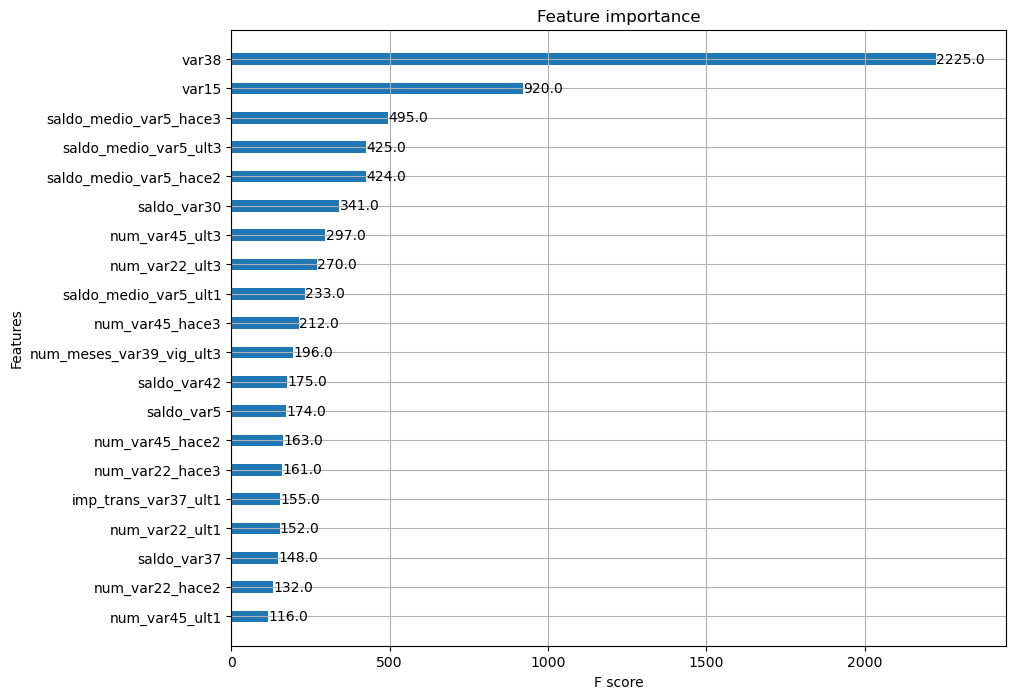

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

--------------------------------------

**-LightGBM 모델 학습과 하이퍼 파라미터 튜닝(XGB방식과 동일(파라미터만 다름->max_depth vs num_leaves)**

In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1), # 트리의 리프노드가 중요한 파라미터
                     'max_depth': hp.quniform('max_depth', 100, 160, 1), #lgbm에서는 트리의 깊이는 크게 상관하지않는다
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [ ]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))